1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading CSV File

In [2]:
path = "/content/drive/MyDrive/mushrooms.csv"
df = pd.read_csv(path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

3. Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


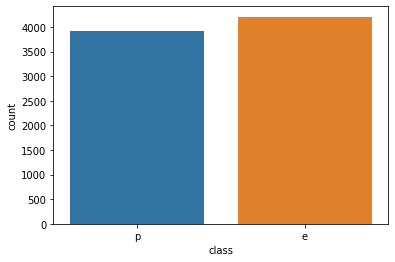

In [5]:
sns.countplot(df['class'])
plt.show()

This shows that the count of edible mushrooms are compartively more than the poisonous ones.

<Figure size 1152x720 with 0 Axes>

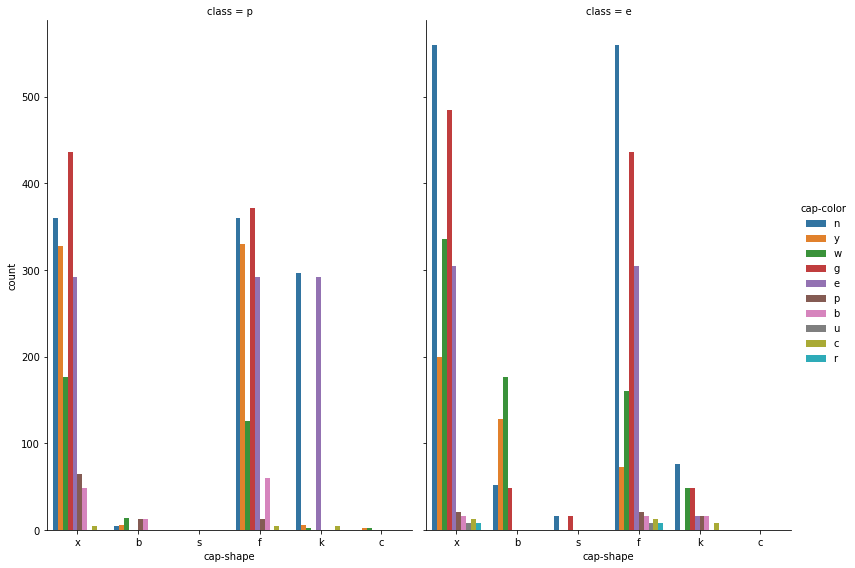

In [6]:
plt.figure(figsize = (16,10))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",data=df, kind="count", height=8, aspect=.7);

1. White Coloured and Bell Shaped Mushrooms are highly recommended for eating.
2. Red Coloured Knobbed Shaped Mushrooms are poisonous and not edible.

<Figure size 1152x720 with 0 Axes>

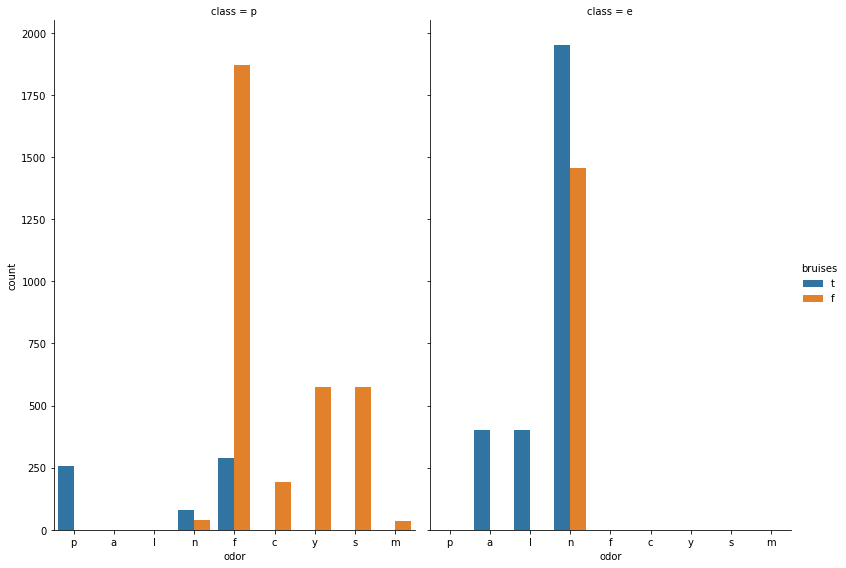

In [7]:
plt.figure(figsize = (16,10))
g = sns.catplot(x="odor", hue="bruises", col="class",data=df, kind="count", height=8, aspect=.7);

1. Odourless and Bruised Mushrooms are highly recommended for eating.
2. Fishy Odour with No Bruises Mushrooms are poisonous.

<Figure size 1152x720 with 0 Axes>

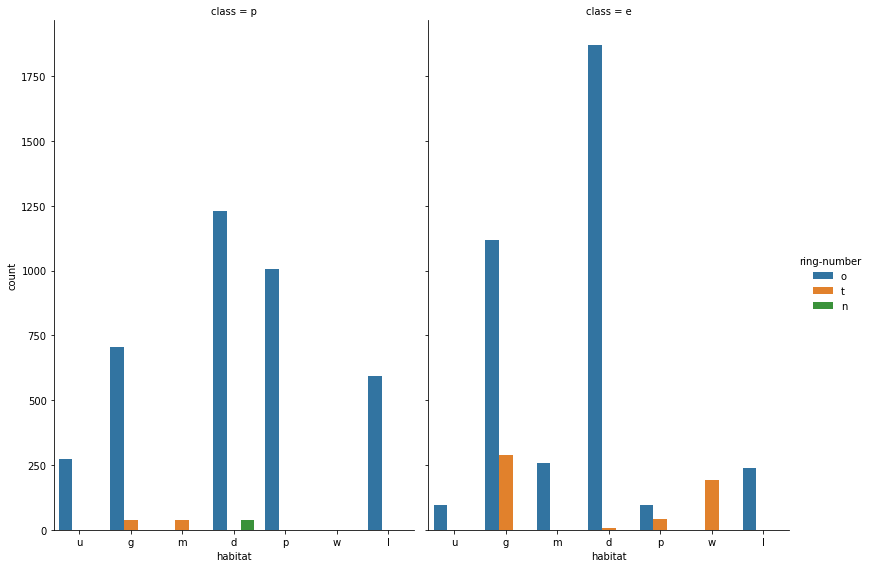

In [8]:
plt.figure(figsize = (16,10))
h = sns.catplot(x="habitat", hue="ring-number", col="class",data=df, kind="count", height=8, aspect=.7);

1. Paths habitat with one rings are more preferred over others.
2. Only mushroom in woods have 0 rings.

In [9]:
# to convert all labels/variables into integer so that we make analysis.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
x = df.drop(['class'], axis=1)
y = df['class']

4. Test-Train Split

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3 , random_state = 0)

5. Decision Tree

In [12]:
#importing Decisiontree and fiting it to the data frame.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, max_depth = 5 )
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [13]:
dt.score(x_train , y_train)

0.9778403095321843

In [14]:
predictions = dt.predict(x_test)


In [15]:
#Checking the accuracy of decision tree with the predicted value.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9827727645611156

We got 98.27% accuracy from Decesion Tree.

6. Random Forest 

In [18]:
#importing randomforest and fiting it to the data frame.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9915582131551178

In [20]:
#Checking the accuracy of random forest with the predicted value.
predictions = rf.predict(x_test)
accuracy_score(y_test, predictions)

0.9913863822805579

We got 99.13% accuracy from Random Forest method.

**Random Forest gives us a better accuracy compared to Decision Tree**